In [1]:
import numpy as np
import matplotlib.pylab as plt
from astropy.io import fits

In [2]:
%matplotlib inline

In [3]:
sdata = fits.open('sweep-100p060-110p065.fits')

In [4]:
sdata.info()

Filename: sweep-100p060-110p065.fits
No.    Name         Type      Cards   Dimensions   Format
  0  PRIMARY     PrimaryHDU      63   ()      
  1  SWEEP       BinTableHDU    326   1197957R x 130C   [J, J, 8A, J, 4A, D, D, E, E, 5E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, I, I, I, I, I, I, I, I, I, I, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, I, I, I, I, I, I, I, I, I, I, I, I, B, B, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, 8A, E, E, E, E, E, E, E, E, E, E, E, E, E, E]   


In [5]:
slist = sdata

In [6]:
sdata = slist[1].data

In [7]:
import  re

In [8]:
sdata['TYPE']

chararray(['REX', 'PSF', 'PSF', ..., 'EXP', 'PSF', 'EXP'], 
      dtype='<U4')

In [9]:
typearr = sdata['TYPE']

In [10]:
ipsfbool = [i for i in range(len(typearr)) if (re.search('PSF',typearr[i]) != None) ]

In [11]:
sdata.shape

(1197957,)

In [12]:
len(typearr[ipsfbool])

536352

In [13]:
gflux = sdata['FLUX_G'][ipsfbool]
rflux = sdata['FLUX_R'][ipsfbool]
givar = sdata['FLUX_IVAR_G'][ipsfbool]
rivar = sdata['FLUX_IVAR_R'][ipsfbool]

In [14]:
gflux[0:10]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.], dtype=float32)

In [15]:
sdata['FLUX_G'][ipsfbool[0:10]]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.], dtype=float32)

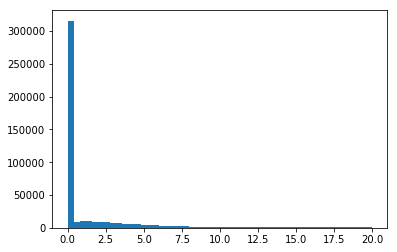

In [16]:
a,b,c =plt.hist(gflux*np.sqrt(givar),bins=50,range=[0,20])

In [17]:
gmag = -2.5*(np.log10(gflux)-9.)
rmag = -2.5*(np.log10(rflux)-9.)

/Users/crockosi/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: RuntimeWarning: divide by zero encountered in log10
  if __name__ == '__main__':
/Users/crockosi/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in log10
  if __name__ == '__main__':
/Users/crockosi/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in log10
  from ipykernel import kernelapp as app
/Users/crockosi/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in log10
  from ipykernel import kernelapp as app


In [18]:
gmr = gmag-rmag

/Users/crockosi/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in subtract
  if __name__ == '__main__':


In [19]:
psfdepthg = sdata['PSFDEPTH_G'][ipsfbool]
psflimg = 5./np.sqrt(psfdepthg)
psflimgmag = -2.5*(np.log10(5./np.sqrt(psfdepthg))-9.)

/Users/crockosi/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in true_divide
  from ipykernel import kernelapp as app
/Users/crockosi/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:3: RuntimeWarning: divide by zero encountered in true_divide
  app.launch_new_instance()


In [20]:
psfdepthr = sdata['PSFDEPTH_R'][ipsfbool]
psflimr = 5./np.sqrt(psfdepthr)
psflimrmag = -2.5*(np.log10(5./np.sqrt(psfdepthr))-9.)

/Users/crockosi/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in true_divide
  from ipykernel import kernelapp as app
/Users/crockosi/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:3: RuntimeWarning: divide by zero encountered in true_divide
  app.launch_new_instance()


In [21]:
np.max(psfdepthg)

1139.788

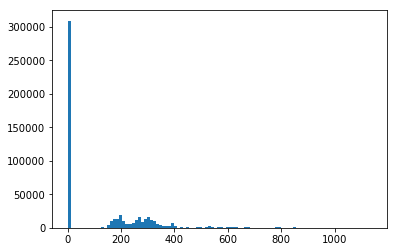

In [22]:
a,b,c = plt.hist(psfdepthg, bins=100)

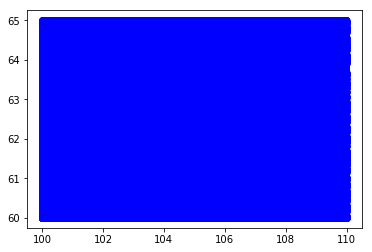

In [23]:
plt.plot(sdata['RA'],sdata['DEC'],'bo')

In [24]:
igoodg,=np.where(psfdepthg > 0.)

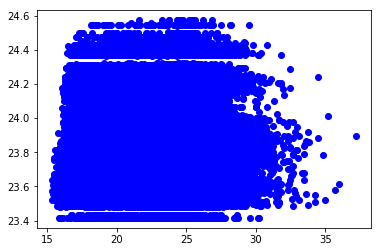

In [25]:
plt.plot(gmag[igoodg],psflimgmag[igoodg],'bo')

In [26]:
igoodr,=np.where(psfdepthr > 0.)

In [27]:
len(igoodr)

248779

In [28]:
np.max(rflux)

150153.75

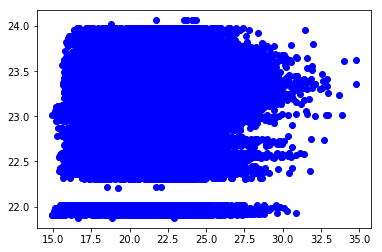

In [29]:
plt.plot(rmag[igoodr],psflimrmag[igoodr],'bo')

In [30]:
idet, = np.where((psfdepthg > 0.) & (psfdepthr > 0) & (gflux > psflimg) & (rflux > psflimr))

In [47]:
idetold, = np.where((gflux > 0) & (gflux*np.sqrt(givar) > 10.) & (rflux > 0) & (rflux*np.sqrt(rivar) > 10.))

In [49]:
idetold2, = np.where((gflux*np.sqrt(givar) > 10.) & (rflux*np.sqrt(rivar) > 10.))

In [52]:
print(len(idet))
print(len(idetold))
print(len(idetold2))

48844
37179
37179


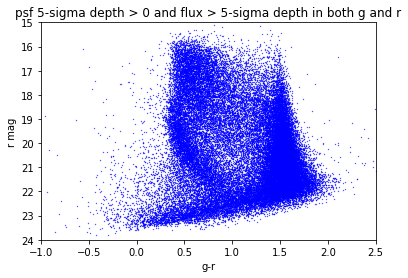

In [59]:
plt.plot(gmr[idet],rmag[idet],'bo',ms=0.3)
plt.ylim(24,15)
plt.xlim(-1,2.5)
plt.xlabel('g-r')
plt.ylabel('r mag')
plt.title('psf 5-sigma depth > 0 and flux > 5-sigma depth in both g and r')

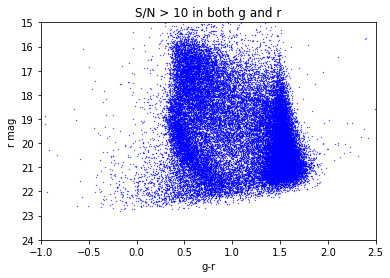

In [55]:
plt.plot(gmr[idetold],rmag[idetold],'bo',ms=0.3)
plt.ylim(24,15)
plt.xlim(-1,2.5)
plt.xlabel('g-r')
plt.ylabel('r mag')
plt.title('flux > 0 and S/N > 10 in both g and r')

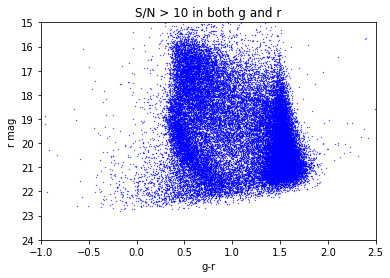

In [57]:
plt.plot(gmr[idetold2],rmag[idetold2],'bo',ms=0.3)
plt.ylim(24,15)
plt.xlim(-1,2.5)
plt.xlabel('g-r')
plt.ylabel('r mag')
plt.title('S/N > 10 in both g and r')

In [43]:
idet2, = np.where((psfdepthg > 0.) & (psfdepthr > 0) & (gflux > 2*psflimg) & (rflux > 2*psflimr))

In [53]:
len(idet2)

36984

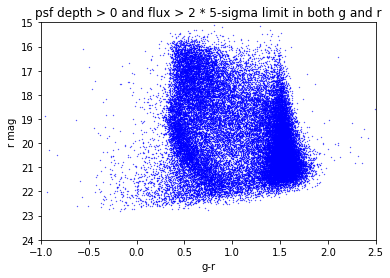

In [60]:
plt.plot(gmr[idet2],rmag[idet2],'bo',ms=0.3)
plt.ylim(24,15)
plt.xlim(-1,2.5)
plt.xlabel('g-r')
plt.ylabel('r mag')
plt.title('psf depth > 0 and flux > 2 * 5-sigma limit in both g and r')